In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout,Flatten,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
real = pd.read_csv(r"C:\Users\shubh\Desktop\english data\real data\true.csv")
fake = pd.read_csv(r"C:\Users\shubh\Desktop\english data\real data\false.csv")

In [3]:
real.head()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0


In [4]:
fake.isnull().sum()

date         0
headline     0
content      0
newspaper    0
label        0
dtype: int64

In [5]:
fake.dropna()

,date,headline,content,newspaper,label
0,2013-01-02,Marijuana Legalization Causing Housing Boom in...,New numbers have come out indicating that in ...,humortimes,1
1,2013-01-02,NRA Head Wayne LaPierre Fits Profile Of 'Lone ...,"Wayne LaPierre, notorious leader of the gun c...",humortimes,1
2,2013-01-03,"Driven Mad by Politics, Americans Jump Like Le...",Driven to the brink of insanity by constant w...,humortimes,1
3,2013-01-03,Government plan to promote car travel 'going b...,THE government’s ongoing campaign to drive co...,thedailymash,1
4,2013-01-04,Jesus Cancels Second Coming Due to Lack of Int...,Coming down incognito to plan for his much-an...,humortimes,1
...,...,...,...,...,...
46945,2023-07-06,EXCLUSIVE: Security tapes show AOC doing lines...,"WASHINGTON, DC—Genesius Times have obtained s...",genesiustimes,1
46946,2023-07-06,“We’ll be so easy!” promises table about to ru...,TORONTO – In a stunning display of complete l...,thebeaverton,1
46947,2023-07-06,Mennonite Grandma Smuggles Baking Powder into ...,"WASHINGTON, DC Mrs. Janzen of Goessel, Kansas...",theungerreview,1
46948,2023-07-07,Entrepreneur Who Stockpiled TP in Lockdown Now...,West Betoota Forklift driver Scott “Sorby” So...,thebetootaadvocate,1


In [6]:
fake=fake.drop_duplicates()

In [7]:
fake.head()

,date,headline,content,newspaper,label
0,2013-01-02,Marijuana Legalization Causing Housing Boom in...,New numbers have come out indicating that in ...,humortimes,1
1,2013-01-02,NRA Head Wayne LaPierre Fits Profile Of 'Lone ...,"Wayne LaPierre, notorious leader of the gun c...",humortimes,1
2,2013-01-03,"Driven Mad by Politics, Americans Jump Like Le...",Driven to the brink of insanity by constant w...,humortimes,1
3,2013-01-03,Government plan to promote car travel 'going b...,THE government’s ongoing campaign to drive co...,thedailymash,1
4,2013-01-04,Jesus Cancels Second Coming Due to Lack of Int...,Coming down incognito to plan for his much-an...,humortimes,1


In [8]:
real.isnull().sum()

date         0
headline     0
content      0
newspaper    0
label        0
dtype: int64

In [9]:
real.dropna()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0
...,...,...,...,...,...
49802,2023-09-11,A Tamil Nadu business which places its employe...,Techies Venkatesh Ramarathinam and his wife Ak...,timesofindia,0
49803,2023-09-11,"UP Crime News: Burglars take cash, gold, leave...",KANPUR: A house in in Krishna Vihar area of Na...,timesofindia,0
49804,2023-09-11,Ed Summons To Abhishek On Day Of Delhi India M...,KOLKATA: The Enforcement Directorate (ED) on S...,timesofindia,0
49805,2023-09-11,Saudi Arabia Crown Prince Salman meets PM Mod...,NEW DELHI: Saudi Arabian prime minister and cr...,timesofindia,0


In [10]:
real=real.drop_duplicates()

In [11]:
real.head()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0


In [12]:
# Merging the text and title columns in one
real['text'] = real['headline'] + " " + real['content']
fake['text'] = fake['headline'] + " " + fake['content']

In [13]:
real['text'] = real['text'].apply(lambda x:str(x).lower())
fake['text'] = fake['text'].apply(lambda x:str(x).lower())

In [14]:
df = pd.concat([real, fake], ignore_index=True)

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
df = df[['text', 'newspaper', 'label']]

In [18]:
df

,text,newspaper,label
0,latvia increases belarus border protection aft...,usnewsandworldreport,0
1,biden praises lightfoot for how many chicagoan...,genesiustimes,1
2,how to make your quarantine just as good as yo...,thedailymash,1
3,what are the symptoms of prostate cancer and h...,Independent,0
4,tropical storm harold makes landfall on padre ...,reuters,0
...,...,...,...
96752,india's adani group rejects occrp report it us...,reuters,0
96753,uncircumcised man slips on turtleneck caledon...,thebeaverton,1
96754,un shuts european office due to security issue...,usnewsandworldreport,0
96755,britons impressed by big percentages statisti...,thedailymash,1


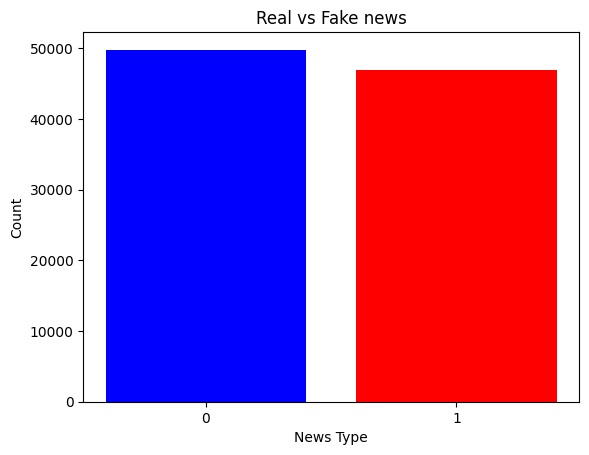

In [19]:
counts = df['label'].value_counts()
labels = ['0', '1']
values = counts.values
colors = ['blue', 'red']
plt.bar(labels, values, color=colors)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Real vs Fake news')
plt.show()

In [20]:
df['newspaper'] = df['newspaper'].str.lower()

In [21]:
df['newspaper'].value_counts()

thebetootaadvocate       14384
independent              11622
theonion                  8221
thedailymash              7968
reuters                   7072
indianexpress             6622
thebeaverton              5637
theguardian               4783
usnewsandworldreport      4574
clickholenews             3276
genesiustimes             2936
theungerreview            2809
washingtonpost            2168
huffpost                  2024
timesofindia              1988
cnn                       1898
sidneymorningherald       1709
humortimes                1694
bbc                       1317
aljazeera                 1271
abc                       1157
usatoday                   968
politico                   634
waterfordwhispersnews       25
Name: newspaper, dtype: int64

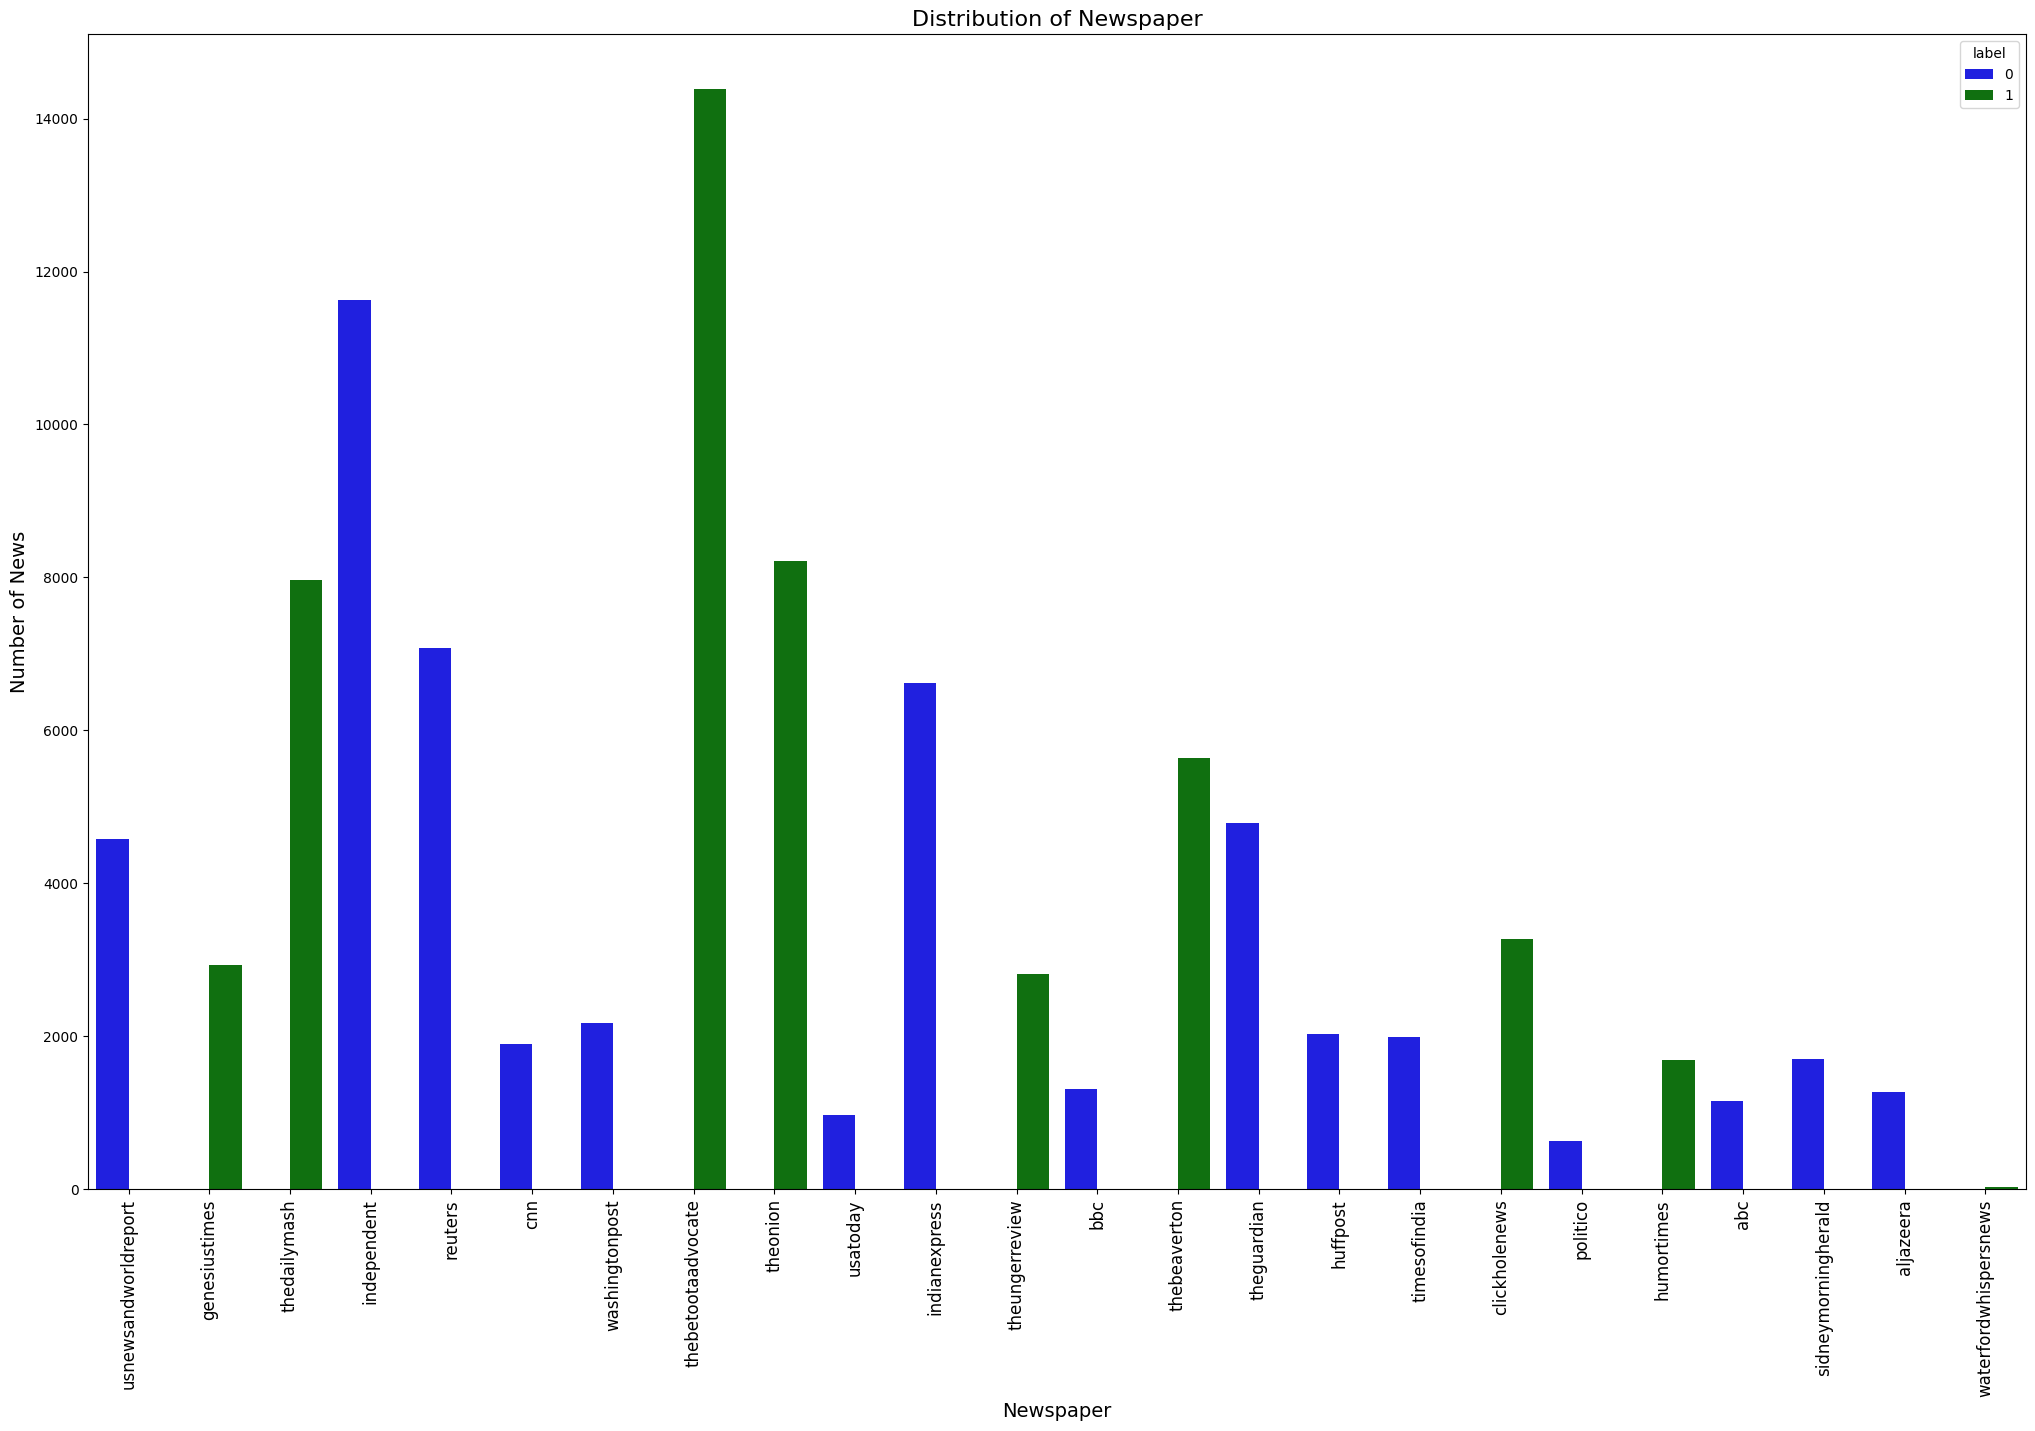

In [22]:
colors = ['blue', 'green']

plt.figure(figsize=(25, 15))
sns.countplot(x=df['newspaper'], hue=df['label'], palette=colors)
plt.title('Distribution of Newspaper', fontsize=16)
plt.xlabel('Newspaper', fontsize=14)
plt.ylabel('Number of News', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [23]:
df.shape

(96757, 3)

In [27]:
def clean_text(text):
    text = re.sub(r'(www\.\S+|http\S+)', '', text)
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(r'\d+', '', text)           
    text = re.sub(r"\s+", " ", text)         
    text = re.sub(r"_+", '', text)            
    text = re.sub(r'[\$€£₹]', '', text)     
    return text

In [28]:
df['text'] = df['text'].apply(clean_text)

In [29]:
df['text'][3]

'what are the symptoms of prostate cancer and how common is it awardwinning british author alex wheatle has revealed he has been diagnosed with prostate cancer mr wheatle has published books since his debut novel brixton rock in and will be familiar to many as the subject of an episode of steve mcqueen is bafta winning small axe series about black british lives he received the bad news after being hospitalised following an asthma attack in february speaking exclusively to the independent mr wheatle a fatherofthree said it was a big shock and it is especially hard news to tell your family the writer said that he felt cheated and admits he struggled with telling his five siblings and yearold mother with whom he was only reunited years ago after growing up in care i have not known them all my life it is only been odd years or so since i traced them he said it feels like i have been cheated in a way all of us have managed to build this fantastic relationship and then this happens prostate 

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    words = word_tokenize(text)
    clean_text = [word for word in words if word not in stopwords_list]
    return ' '.join(clean_text)

In [32]:
df['text'] = df['text'].apply(remove_stopwords)

In [33]:
df

,text,newspaper,label
0,latvia increases belarus border protection ill...,usnewsandworldreport,0
1,biden praises lightfoot many chicagoans gotten...,genesiustimes,1
2,make quarantine good holiday break outside uk ...,thedailymash,1
3,symptoms prostate cancer common awardwinning b...,independent,0
4,tropical storm harold makes landfall padre isl...,reuters,0
...,...,...,...
96752,india adani group rejects occrp report used 'o...,reuters,0
96753,uncircumcised man slips turtleneck caledon exa...,thebeaverton,1
96754,un shuts european office due security issue ge...,usnewsandworldreport,0
96755,britons impressed big percentages statisticall...,thedailymash,1


In [34]:
df['text'][3]

'symptoms prostate cancer common awardwinning british author alex wheatle revealed diagnosed prostate cancer mr wheatle published books since debut novel brixton rock familiar many subject episode steve mcqueen bafta winning small axe series black british lives received bad news hospitalised following asthma attack february speaking exclusively independent mr wheatle fatherofthree said big shock especially hard news tell family writer said felt cheated admits struggled telling five siblings yearold mother reunited years ago growing care known life odd years since traced said feels like cheated way us managed build fantastic relationship happens prostate cancer common form cancer among men uk affecting approximately one eight men lifetime condition likely affect men age diagnosed younger age symptoms treatment everything need know condition name suggests prostate cancer occurs prostate gland located base bladder main function prostate gland male reproductive organ secrete prostate fluid

###  wordcloud for fake news ###

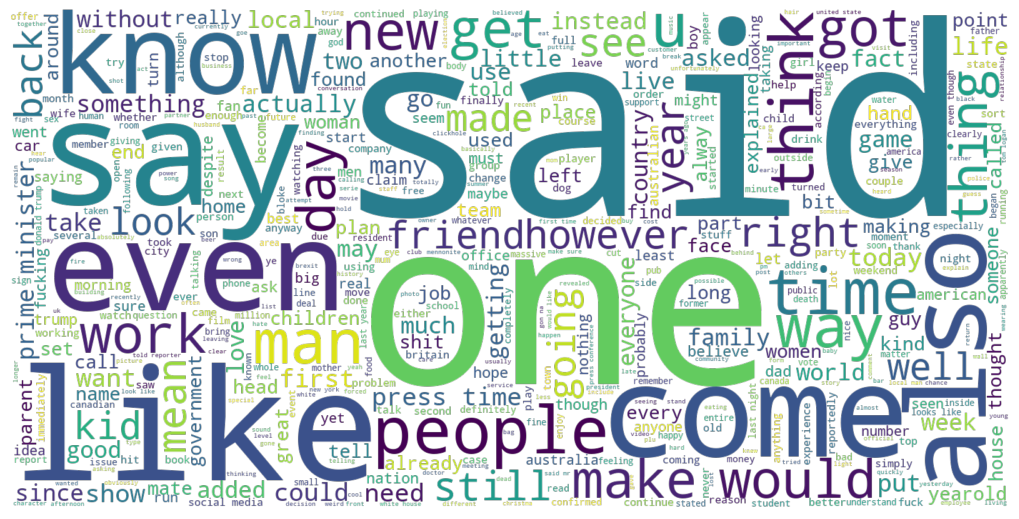

In [35]:
text = " ".join(df[df['label'] == 1]['text'])

wordcloud = WordCloud(
    max_words = 500,
    width = 1600,
    height=800,
    background_color=None,  
    mode="RGBA",  
    stopwords=set(stopwords.words("english"))  
).generate(text)

fig = plt.figure(
    figsize=(10, 10),
    facecolor='none', 
    edgecolor='none'
)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### wordcloud for real news ###

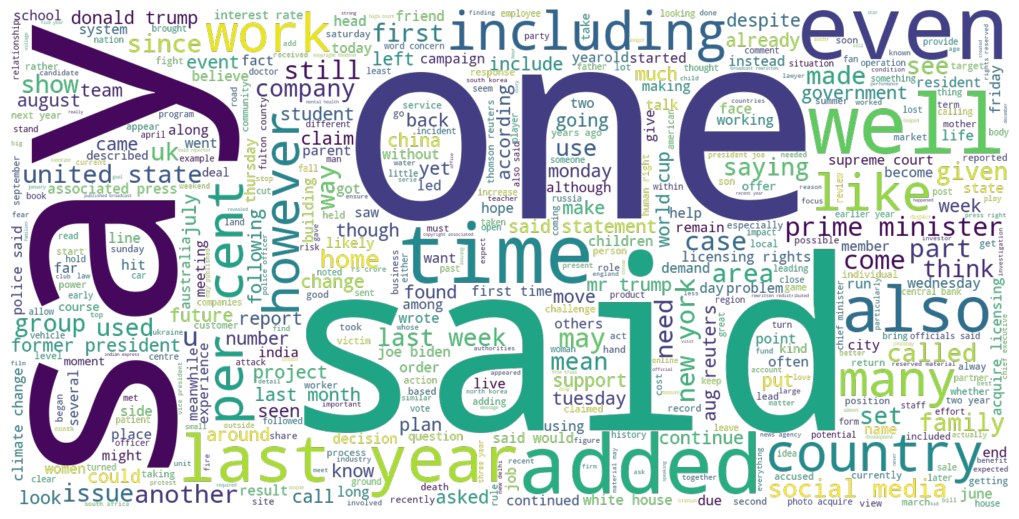

In [36]:
text = " ".join(df[df['label'] == 0]['text'])
wordcloud = WordCloud(
    max_words = 500,
    width = 1600,
    height=800,
    background_color=None,  
    mode="RGBA",  
    stopwords=set(stopwords.words("english"))  
).generate(text)

fig = plt.figure(
    figsize=(10, 10),
    facecolor='none', 
    edgecolor='none'
)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
X =df['text']
y = df['label']    #real label as 0 and fake as 1
z = df['newspaper']

In [38]:
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=0, stratify=z)
X_train, X_val, y_train, y_val, z_train, z_val = train_test_split(X_train, y_train, z_train, test_size=0.2, random_state=0, stratify= z_train)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(61924,)
(19352,)
(15481,)
(61924,)
(19352,)
(15481,)


In [40]:
def print_value_counts(X, y, z, name):
    print(f'{name} set:')
    print('Value counts for newspaper:')
    print(z.value_counts())
    print('\nValue counts for label:')
    print(y.value_counts())
    print('-' * 30)

print_value_counts(X_train, y_train, z_train, 'Train')
print_value_counts(X_test, y_test, z_test, 'Test')
print_value_counts(X_val, y_val, z_val, 'Validation')

Train set:
Value counts for newspaper:
thebetootaadvocate       9206
independent              7438
theonion                 5262
thedailymash             5099
reuters                  4526
indianexpress            4238
thebeaverton             3608
theguardian              3061
usnewsandworldreport     2927
clickholenews            2097
genesiustimes            1879
theungerreview           1798
washingtonpost           1387
huffpost                 1295
timesofindia             1272
cnn                      1214
sidneymorningherald      1094
humortimes               1084
bbc                       843
aljazeera                 814
abc                       741
usatoday                  619
politico                  406
waterfordwhispersnews      16
Name: newspaper, dtype: int64

Value counts for label:
0    31875
1    30049
Name: label, dtype: int64
------------------------------
Test set:
Value counts for newspaper:
thebetootaadvocate       2877
independent              2324
theonion 

In [41]:
maxlen = 300
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train= pad_sequences(X_train, maxlen = maxlen,padding="post",truncating="post")

X_test = tokenizer.texts_to_sequences(X_test)
X_test= pad_sequences(X_test, maxlen = maxlen,padding="post",truncating="post")

X_val = tokenizer.texts_to_sequences(X_val)
X_val= pad_sequences(X_val, maxlen = maxlen,padding="post",truncating="post")

In [42]:
tokenizer.word_index

{'said': 1,
 'would': 2,
 'one': 3,
 'people': 4,
 'also': 5,
 'like': 6,
 'new': 7,
 'time': 8,
 'us': 9,
 'year': 10,
 'could': 11,
 'get': 12,
 'two': 13,
 'first': 14,
 'last': 15,
 'government': 16,
 'years': 17,
 'trump': 18,
 'even': 19,
 'state': 20,
 'told': 21,
 'day': 22,
 'back': 23,
 'president': 24,
 'police': 25,
 'world': 26,
 'make': 27,
 'going': 28,
 'many': 29,
 'says': 30,
 'since': 31,
 'made': 32,
 'may': 33,
 'around': 34,
 'know': 35,
 'country': 36,
 'former': 37,
 'still': 38,
 'mr': 39,
 'news': 40,
 'way': 41,
 'minister': 42,
 'home': 43,
 'take': 44,
 'according': 45,
 'work': 46,
 'week': 47,
 'man': 48,
 'go': 49,
 'say': 50,
 'three': 51,
 'court': 52,
 'come': 53,
 'including': 54,
 'much': 55,
 'think': 56,
 'really': 57,
 'see': 58,
 'need': 59,
 'well': 60,
 'public': 61,
 'want': 62,
 'got': 63,
 'house': 64,
 'local': 65,
 'family': 66,
 'next': 67,
 'party': 68,
 'every': 69,
 'another': 70,
 'good': 71,
 'case': 72,
 'life': 73,
 'city': 74,
 '

In [43]:
X_train[1]

array([ 11873,  48946,    197,    950,   2445,   1014,    428,   6673,
         6149,    348,   2889,   6673,    287,    741,   2902,  39765,
         7052,     48,   2024,    836,  11873,    148,   5745,  32061,
        28767,   7103,   8574,   1721,    260,    919,   2445,    146,
         2383,  11873,   2580, 142567,   9354,  17599,    197,   6239,
          950,    660,     76,  34164,  51049,    810,    810,    810,
         5308,  11873,   1509,  25099,    197,    950,    135,   9422,
        39766,    151,     17,    111,   6054,   1607,   2247,     49,
       142568,   4521,  16015,    151,  35781,  18542,      2,    238,
          209, 142569,  26987,  11873,  31430,    197,    714,  39767,
           32,     41,   6673,   1418,   2824,     93,   1149,    304,
           88,   1063,  11873,   5720,    807,  56328,   1014,    428,
          503,   1753,  40986,  10588,   7646, 109296,  10200,   3744,
          304,   5745,      6,    206,     35,   1129,    271,  10200,
      

In [44]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

258725

In [45]:
def load_glove_vectors():
    embeddings_index = {}
    with open(r'C:\Users\shubh\Desktop\english data\glove.6B.100d.txt',encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index

embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


In [46]:
embeddings_index['coffee']

array([ 0.12632  ,  0.86414  , -0.46052  ,  0.26095  ,  0.077033 ,
        0.076186 ,  0.71959  ,  0.38122  , -0.10287  , -0.44388  ,
       -0.52962  , -1.0485   , -0.0086082,  0.74915  , -0.15369  ,
        0.13386  ,  0.27879  , -0.46137  ,  0.24354  , -0.2938   ,
        0.018044 ,  0.63083  ,  0.7563   , -0.53305  , -0.087608 ,
        0.64316  ,  0.32683  , -0.80606  , -0.43119  , -0.20887  ,
        0.04233  ,  0.353    ,  0.88587  , -0.19565  ,  0.089291 ,
        1.2422   ,  0.30059  ,  0.11292  ,  0.58895  , -1.1495   ,
        0.04609  , -0.6724   ,  0.15442  , -1.0943   ,  0.6908   ,
        0.25969  , -1.0809   , -0.25303  ,  0.13122  , -1.3414   ,
       -0.39785  ,  0.041388 , -0.46881  ,  0.57462  , -0.40331  ,
       -0.98234  , -1.0115   ,  0.44262  ,  1.298    , -0.24297  ,
        0.10954  ,  0.35864  , -0.39146  , -0.68843  , -0.23691  ,
       -0.46501  ,  0.83416  , -0.61574  ,  1.2178   , -0.98078  ,
       -0.19633  ,  0.56886  ,  0.84273  ,  0.08674  , -0.3358

In [47]:
dim=100
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

In [48]:
# early stopping
early_stopping =EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

In [49]:
#Define model
model = Sequential()
model.add(Embedding(vocab_size, output_dim=dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(units = 64,return_sequences = True, recurrent_dropout = 0.2,dropout = 0.2)))
model.add(Bidirectional(LSTM(units = 32,recurrent_dropout = 0.1,dropout = 0.1)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [50]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          25872500  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 25,999,253
Trainable params: 126,753
Non-t

In [52]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs = 10, callbacks=callbacks_list)

Epoch 1/10
1936/1936 [==============================] - 2131s 1s/step - loss: 0.1563 - accuracy: 0.9400 - val_loss: 0.1590 - val_accuracy: 0.9413
Epoch 2/10
1936/1936 [==============================] - 2439s 1s/step - loss: 0.0772 - accuracy: 0.9719 - val_loss: 0.0579 - val_accuracy: 0.9795
Epoch 3/10
1936/1936 [==============================] - 2637s 1s/step - loss: 0.0554 - accuracy: 0.9799 - val_loss: 0.0493 - val_accuracy: 0.9812
Epoch 4/10
1936/1936 [==============================] - 2391s 1s/step - loss: 0.0404 - accuracy: 0.9859 - val_loss: 0.0432 - val_accuracy: 0.9839
Epoch 5/10
1936/1936 [==============================] - 2170s 1s/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.0436 - val_accuracy: 0.9859
Epoch 6/10
1936/1936 [==============================] - 2342s 1s/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 6: early stopping


In [53]:
print("Accuracy Score (Training): " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy Score (Test): " , model.evaluate(X_test,y_test)[1]*100 , "%")

1936/1936 [==============================] - 596s 308ms/step - loss: 0.0224 - accuracy: 0.9930
Accuracy Score (Training):  99.29913878440857 %
605/605 [==============================] - 179s 296ms/step - loss: 0.0438 - accuracy: 0.9844
Accuracy Score (Test):  98.4394371509552 %


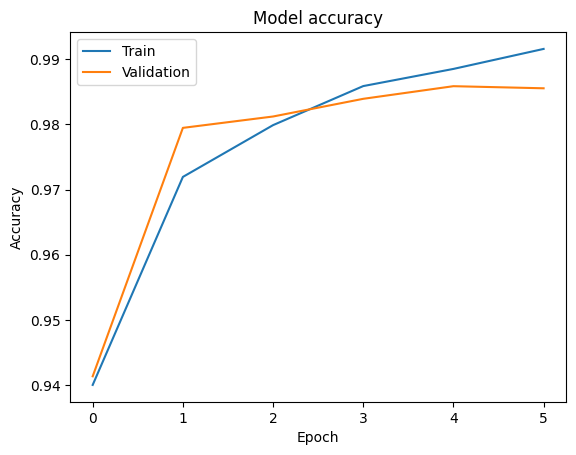

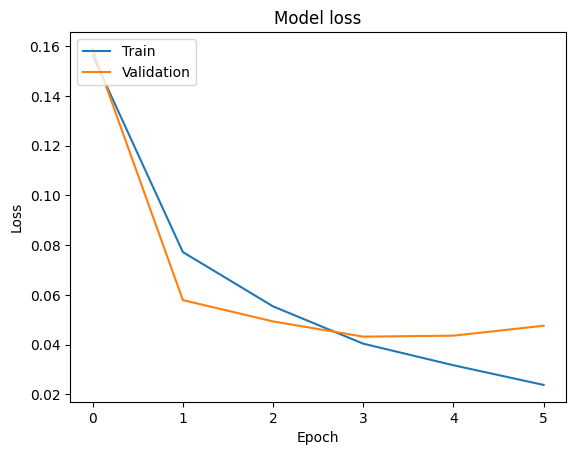

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

605/605 [==============================] - 169s 277ms/step


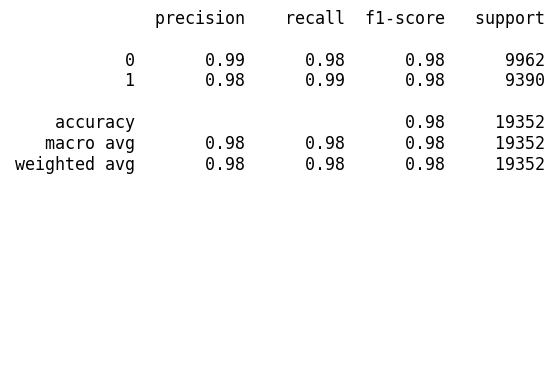

In [56]:
from sklearn.metrics import classification_report,accuracy_score
report=classification_report(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.text(0.01, 0.5, report, {'fontsize': 12}, fontfamily='monospace')
plt.axis('off')
plt.tight_layout()
plt.show()

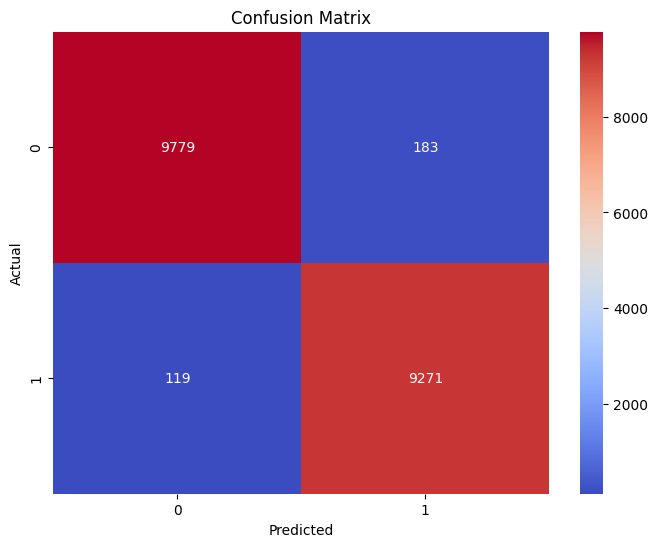

In [57]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.9844785691484939


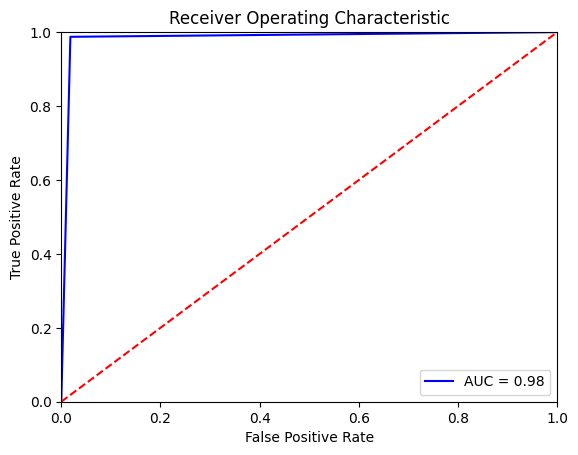

In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#with open('tokenizer.pickle', 'wb') as f:
#    pickle.dump(tokenizer, f)

In [ ]:
#from keras.models import load_model

In [ ]:
model.save('BILSTM.h5')

In [60]:
X=['''Russian shelling kills 2 in Kherson, Ukrainian officials say.

At least two people were killed and five others were wounded in the southern city of Kherson following Russian shelling overnight, Ukrainian officials said Thursday.

In a Telegram post, Oleksandr Prokudin, head of the Kherson region military administration, said two men ages 29 and 41 died in a Russian strike on a dormitory.

"A terrible night for Kherson city," he said.

Among the injured are three women and two men, he added.

Roman Mrochko, head of the Kherson city military administration, said apartment buildings and cars were damaged after Russian forces shelled residential areas.

Reports of the shelling in Kherson Thursday comes after Ukrainian officials said Russian attacks had injured seven people in Kyiv and two others in the northeastern city of Kharkiv.''']

In [61]:
X = tokenizer.texts_to_sequences(X)
print(X)
X = pad_sequences(X,maxlen=300,padding="post",truncating="post")
print(X)
val = model.predict(X)
print(val)
print(( val >= 0.5).astype(int))
if val >= 0.5:
    print("The news is fake.")
else:
    print("The news is real.")

[[168, 7090, 6587, 8749, 599, 119, 50, 162, 13, 4, 371, 183, 286, 3613, 907, 74, 8749, 189, 168, 7090, 2271, 599, 119, 1, 163, 3861, 360, 10223, 29636, 197, 8749, 414, 185, 512, 1, 13, 241, 3462, 444, 168, 870, 31152, 2202, 160, 8749, 74, 1, 218, 1346, 51, 97, 13, 241, 75, 5471, 197, 8749, 74, 185, 512, 1, 2101, 1264, 1197, 1927, 168, 604, 19063, 3694, 481, 469, 7090, 8749, 163, 254, 599, 119, 1, 168, 960, 1346, 593, 4, 1508, 13, 286, 6287, 74, 9660]]
[[  168  7090  6587  8749   599   119    50   162    13     4   371   183
    286  3613   907    74  8749   189   168  7090  2271   599   119     1
    163  3861   360 10223 29636   197  8749   414   185   512     1    13
    241  3462   444   168   870 31152  2202   160  8749    74     1   218
   1346    51    97    13   241    75  5471   197  8749    74   185   512
      1  2101  1264  1197  1927   168   604 19063  3694   481   469  7090
   8749   163   254   599   119     1   168   960  1346   593     4  1508
     13   286  6287    74 